In [1]:
import pandas as pd
import os
from tqdm import tqdm

all_file_path = "/share/jake/github/low_n_output/method_2/original_result/lin/eUniRep-Augmenting_train_num_1000_concat_exp_data_multiple_change_norm_do_method3_0_seed_0"
gfp_wt = "MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK"
all_file_list = os.listdir(all_file_path)

all_2_mut_dict = {"name": [], "seq": [], "eUniRep-Augmenting_predict": []}

for file in tqdm(all_file_list):
    temp_df = pd.read_csv(os.path.join(all_file_path, file))
    all_2_mut_dict["name"] += temp_df["name"].to_list()
    all_2_mut_dict["seq"] += temp_df["seq"].to_list()
    all_2_mut_dict["eUniRep-Augmenting_predict"] += temp_df["eUniRep-Augmenting_predict"].to_list()
    
all_2_mut_df = pd.DataFrame(all_2_mut_dict)
all_2_mut_df.sort_values(by = "eUniRep-Augmenting_predict", ascending=False, inplace = True)
all_2_mut_df = all_2_mut_df.reset_index(drop = True)

print(all_2_mut_df.head())

100%|██████████| 28203/28203 [01:26<00:00, 327.58it/s]


      name                                                seq  \
0  169 170  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
1  169 190  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
2  162 169  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
3   96 169  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
4  161 169  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   

   eUniRep-Augmenting_predict  
0                    1.028153  
1                    1.024040  
2                    1.022992  
3                    1.020022  
4                    1.018241  


In [4]:
top_258_df = all_2_mut_df[:258]
classfy_df = pd.DataFrame()

classfy_df["name"] = top_258_df["name"].to_list()
classfy_df["seq"] = top_258_df["seq"].to_list()
classfy_df["eUniRep-Augmenting_predict"] = top_258_df["eUniRep-Augmenting_predict"].to_list()
# print(classfy_df.head())
mutation_pos = []
wt_amion = []
mutation_amion = []
first_pos_list = []
second_pos_list = []
for i in tqdm(range(len(top_258_df))):
    mut_sites = top_258_df["name"].to_list()[i]
    mut_seq = top_258_df["seq"].to_list()[i]
    
    first_pos = int(mut_sites.split(" ")[0])
    second_pos = int(mut_sites.split(" ")[1])
    mutation_pos.append(f"{first_pos+1} {second_pos+1}")#将从0开始计数统一到从1开始。
    wt_amion.append(f"{gfp_wt[first_pos]} {gfp_wt[second_pos]}")
    mutation_amion.append(f"{mut_seq[first_pos]} {mut_seq[second_pos]}")
    assert gfp_wt[first_pos] != mut_seq[first_pos]
    assert gfp_wt[second_pos] != mut_seq[second_pos]
    first_pos_list.append(f"{gfp_wt[first_pos]}_{first_pos+1}_{mut_seq[first_pos]}")#将从0开始计数统一到从1开始。
    second_pos_list.append(f"{gfp_wt[second_pos]}_{second_pos+1}_{mut_seq[second_pos]}")#将从0开始计数统一到从1开始。
classfy_df["mutation_pos"] = mutation_pos
classfy_df["wt_amion"] = wt_amion
classfy_df["mutation_amion"] = mutation_amion
classfy_df["first_pos"] = first_pos_list
classfy_df["second_pos"] = second_pos_list
print(classfy_df.head())
classfy_df.to_csv("/share/jake/github/low_n_output/method_2/temp/eUniRep-Augmenting_method2_train_num_1000_concat_exp_data_multiple_change_norm_top258_double_mutations_seed_0.csv")

100%|██████████| 258/258 [00:00<00:00, 14149.38it/s]

      name                                                seq  \
0  169 170  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
1  169 190  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
2  162 169  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
3   96 169  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   
4  161 169  MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   

   eUniRep-Augmenting_predict mutation_pos wt_amion mutation_amion first_pos  \
0                    1.028153      170 171      N I            S N   N_170_S   
1                    1.024040      170 191      N G            S S   N_170_S   
2                    1.022992      163 170      V N            A S   V_163_A   
3                    1.020022       97 170      T N            A S    T_97_A   
4                    1.018241      162 170      K N            Q S   K_162_Q   

  second_pos  
0    I_171_N  
1    G_191_S  
2    N_170_S  
3    N_170_S  
4    N_170_S  


 41%|████      | 98/238 [00:00<00:00, 870.05it/s]

mut_num_dict_new:  {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 3, '6': 0, '7': 0, '8': 0, '9': 1, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 1, '18': 0, '19': 1, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 2, '33': 0, '34': 1, '35': 0, '36': 0, '37': 0, '38': 1, '39': 0, '40': 0, '41': 9, '42': 0, '43': 1, '44': 0, '45': 0, '46': 0, '47': 4, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 6, '64': 0, '65': 0, '66': 0, '67': 0, '68': 1, '69': 0, '70': 0, '71': 0, '72': 9, '73': 2, '74': 0, '75': 0, '76': 6, '77': 1, '78': 0, '79': 0, '80': 0, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 1, '87': 0, '88': 0, '89': 0, '90': 0, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 27, '98': 0, '99': 0, '100': 0, '101': 1, '102': 0, '103': 0, '104': 0, '105': 22, '106': 0, '107': 1, '108': 0

100%|██████████| 238/238 [00:00<00:00, 424.14it/s]


mut_fit_dict:  {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 3.016114346863068, '6': 0, '7': 0, '8': 0, '9': 1.0088544819220993, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 1.0051035062967406, '18': 0, '19': 1.0033560045631071, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 2.0118524010285013, '33': 0, '34': 1.0020120585248091, '35': 0, '36': 0, '37': 0, '38': 1.0058054693661749, '39': 0, '40': 0, '41': 9.046472649652141, '42': 0, '43': 1.0024665645987063, '44': 0, '45': 0, '46': 0, '47': 4.016004068627354, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 6.025340615175272, '64': 0, '65': 0, '66': 0, '67': 0, '68': 1.0057518880849805, '69': 0, '70': 0, '71': 0, '72': 9.045997718419274, '73': 2.0058329740213585, '74': 0, '75': 0, '76': 6.031039732472761, '77': 1.0000054250068175, '78': 0, '79': 0, '80': 0,

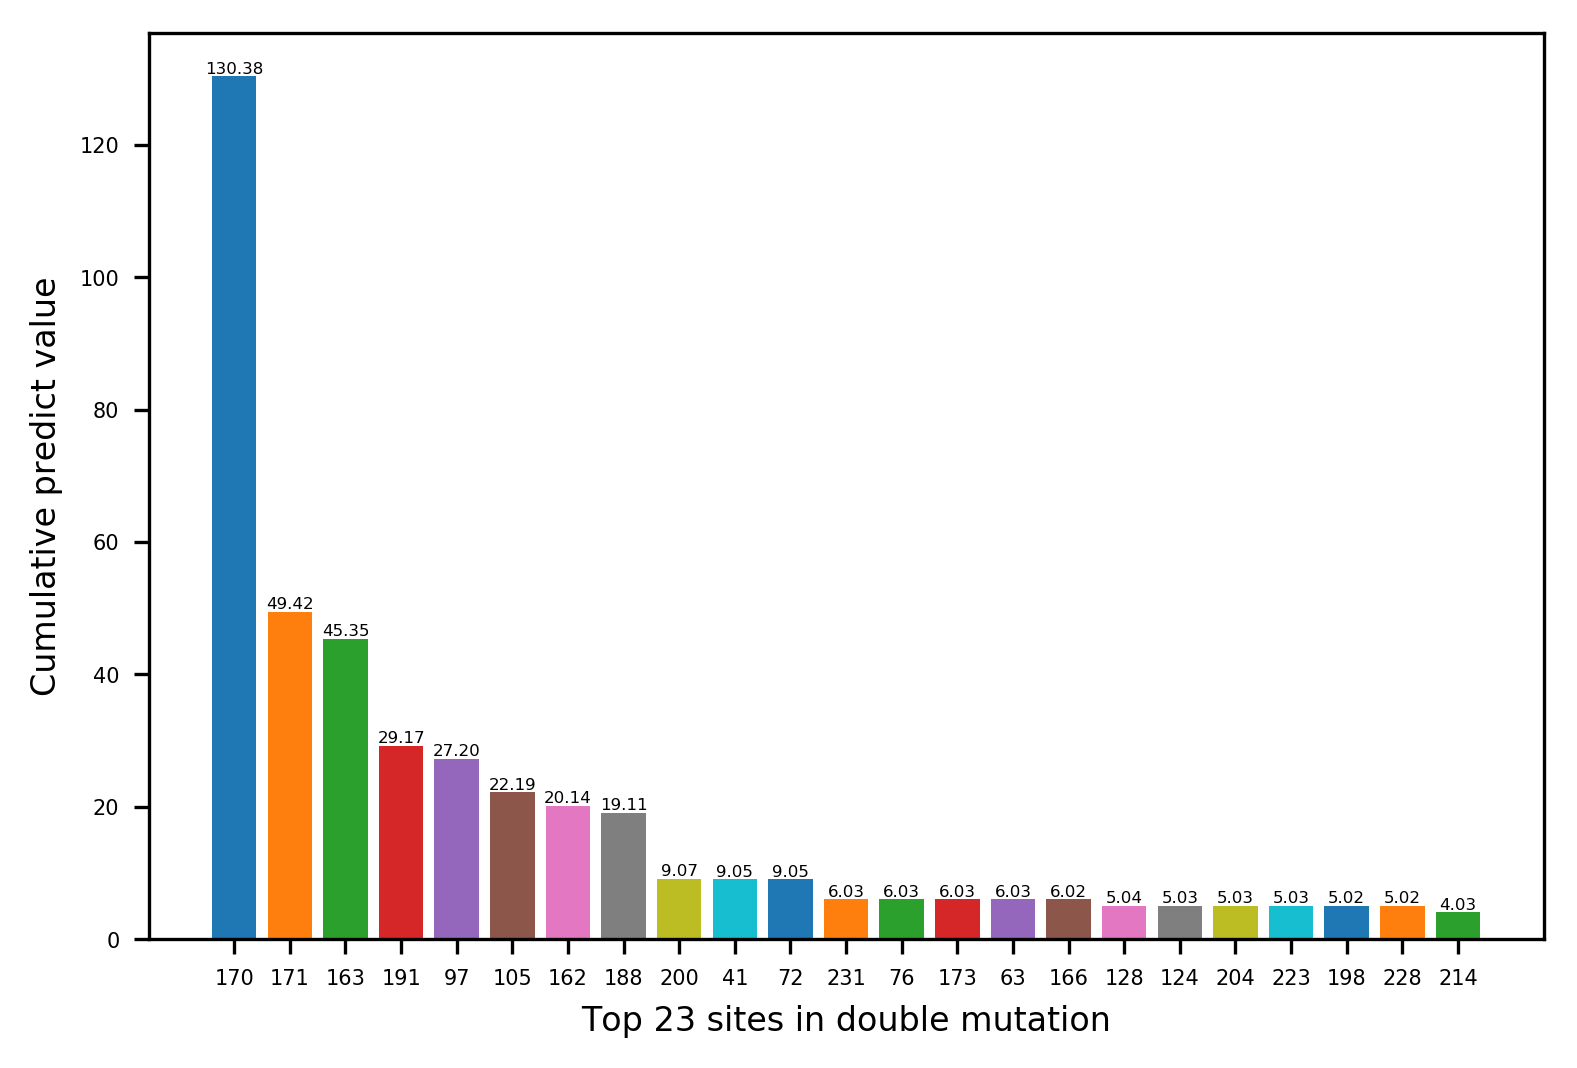

In [8]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

input_path = "/share/jake/github/low_n_output/method_2/temp/eUniRep-Augmenting_method2_top258_double_mutations_seed_0.csv"
all_datas = pd.read_csv(input_path)
mut_pos_list = list(all_datas["mutation_pos"])
mut_num_dict = {}
for mut_pos in mut_pos_list:
    mut_list = mut_pos.split(" ")
    for pos in mut_list:
        if pos in mut_num_dict.keys():
            mut_num_dict[pos] += 1
        else:
            mut_num_dict[pos] = 1
for i in range(239):# avGFP长度
    if str(i) in mut_num_dict.keys():
        continue
    else:
        mut_num_dict[str(i)] = 0
# print(mut_num_dict)
mut_num_dict_new = {}
for i in range(239):
    mut_num_dict_new[str(i)] = mut_num_dict[str(i)]
print("mut_num_dict_new: ", mut_num_dict_new)
mut_fit_dict = {}
for i in range(238):
    mut_fit_dict[str(i)] = 0
for i in tqdm(range(238)):
    for mut_pos in mut_pos_list:
        if str(i) in mut_pos.split(" "):
            fitness = list(all_datas[all_datas["mutation_pos"] == mut_pos]["eUniRep-Augmenting_predict"])[0]
            # print(fitness)
            if str(i) in mut_fit_dict.keys():
                mut_fit_dict[str(i)] += fitness
            else:
                mut_fit_dict[str(i)] = fitness
print("mut_fit_dict: ", mut_fit_dict)
mut_ave_fit_dict = {}
for i in range(238):
    if mut_num_dict_new[str(i)] == 0:
        mut_ave_fit_dict[str(i)] = 0
    else:
        mut_ave_fit_dict[str(i)] = mut_fit_dict[str(i)] / mut_num_dict_new[str(i)]

def bubble_sort(lst_1, lst_2):
    n = len(lst_1)
    for i in range(n):
        for j in range(1, n - i):
            if lst_1[j - 1] > lst_1[j]:
                lst_1[j - 1], lst_1[j] = lst_1[j], lst_1[j - 1]
                lst_2[j - 1], lst_2[j] = lst_2[j], lst_2[j - 1]
    return lst_1, lst_2

target_name = list(mut_fit_dict.keys())
target_fitness = list(mut_fit_dict.values())
target_fitness, target_name = bubble_sort(target_fitness, target_name)

top_10_target_name = target_name[-23:]
top_10_target_fitness = target_fitness[-23:]
top_10_target_name.reverse()
top_10_target_fitness.reverse()
print(top_10_target_name)
print(top_10_target_fitness)

plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams.update({'font.size': 5})
for i, name in enumerate(top_10_target_name):
    plt.bar(str(name),top_10_target_fitness[i])
    plt.text(str(name), top_10_target_fitness[i], "%.2f" % top_10_target_fitness[i], ha="center", va="bottom", fontsize=4)
# plt.title("Use 157 experimental data", fontsize=10)
plt.xlabel("Top 23 sites in double mutation", fontsize=8)
plt.ylabel("Cumulative predict value", fontsize=8)
plt.show()

In [11]:
target_name.reverse()
print(target_name)
sort_dict = {}
for i in range(len(target_name)):
    sort_dict[str(target_name[i])] = i+1


['170', '171', '163', '191', '97', '105', '162', '188', '200', '41', '72', '231', '76', '173', '63', '166', '128', '124', '204', '223', '198', '228', '214', '153', '190', '233', '47', '131', '109', '5', '151', '164', '167', '156', '174', '229', '32', '135', '230', '113', '209', '193', '194', '73', '180', '9', '212', '226', '38', '68', '17', '158', '122', '107', '203', '101', '19', '161', '237', '146', '159', '144', '43', '34', '77', '206', '86', '136', '129', '154', '114', '236', '235', '234', '232', '227', '225', '224', '222', '221', '220', '219', '218', '217', '216', '215', '213', '211', '210', '208', '207', '205', '202', '201', '199', '197', '196', '195', '192', '189', '187', '186', '185', '184', '183', '182', '181', '179', '178', '177', '176', '175', '172', '169', '168', '165', '160', '157', '155', '152', '150', '149', '148', '147', '145', '143', '142', '141', '140', '139', '138', '137', '134', '133', '132', '130', '127', '126', '125', '123', '121', '120', '119', '118', '117', '116

  0%|          | 0/238 [00:00<?, ?it/s]

mut_num_dict_new:  {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 6, '6': 1, '7': 0, '8': 0, '9': 3, '10': 0, '11': 0, '12': 0, '13': 0, '14': 2, '15': 0, '16': 0, '17': 0, '18': 0, '19': 1, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 3, '33': 0, '34': 18, '35': 0, '36': 0, '37': 0, '38': 2, '39': 0, '40': 0, '41': 2, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 3, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 2, '64': 0, '65': 0, '66': 0, '67': 0, '68': 1, '69': 0, '70': 0, '71': 0, '72': 6, '73': 112, '74': 0, '75': 0, '76': 1, '77': 2, '78': 0, '79': 0, '80': 2, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 1, '87': 1, '88': 0, '89': 0, '90': 15, '91': 0, '92': 0, '93': 0, '94': 0, '95': 0, '96': 0, '97': 4, '98': 0, '99': 4, '100': 0, '101': 0, '102': 0, '103': 0, '104': 0, '105': 8, '106': 0, '107': 2, '108':

100%|██████████| 238/238 [00:00<00:00, 519.86it/s]


mut_fit_dict:  {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 6.346517789973857, '6': 1.041071988200314, '7': 0, '8': 0, '9': 3.151655552410233, '10': 0, '11': 0, '12': 0, '13': 0, '14': 2.0827205454219135, '15': 0, '16': 0, '17': 0, '18': 0, '19': 1.0408034299440645, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 0, '28': 0, '29': 0, '30': 0, '31': 0, '32': 3.123622043124991, '33': 0, '34': 19.049654443822575, '35': 0, '36': 0, '37': 0, '38': 2.092501277842524, '39': 0, '40': 0, '41': 2.0837528087294492, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 3.1735039360261794, '48': 0, '49': 0, '50': 0, '51': 0, '52': 0, '53': 0, '54': 0, '55': 0, '56': 0, '57': 0, '58': 0, '59': 0, '60': 0, '61': 0, '62': 0, '63': 2.1019337453182496, '64': 0, '65': 0, '66': 0, '67': 0, '68': 1.0419305539346737, '69': 0, '70': 0, '71': 0, '72': 6.32775314661344, '73': 119.03576432261626, '74': 0, '75': 0, '76': 1.0408255931716868, '77': 2.1057131260624127, '78': 0, '79': 0, '80': 2.0

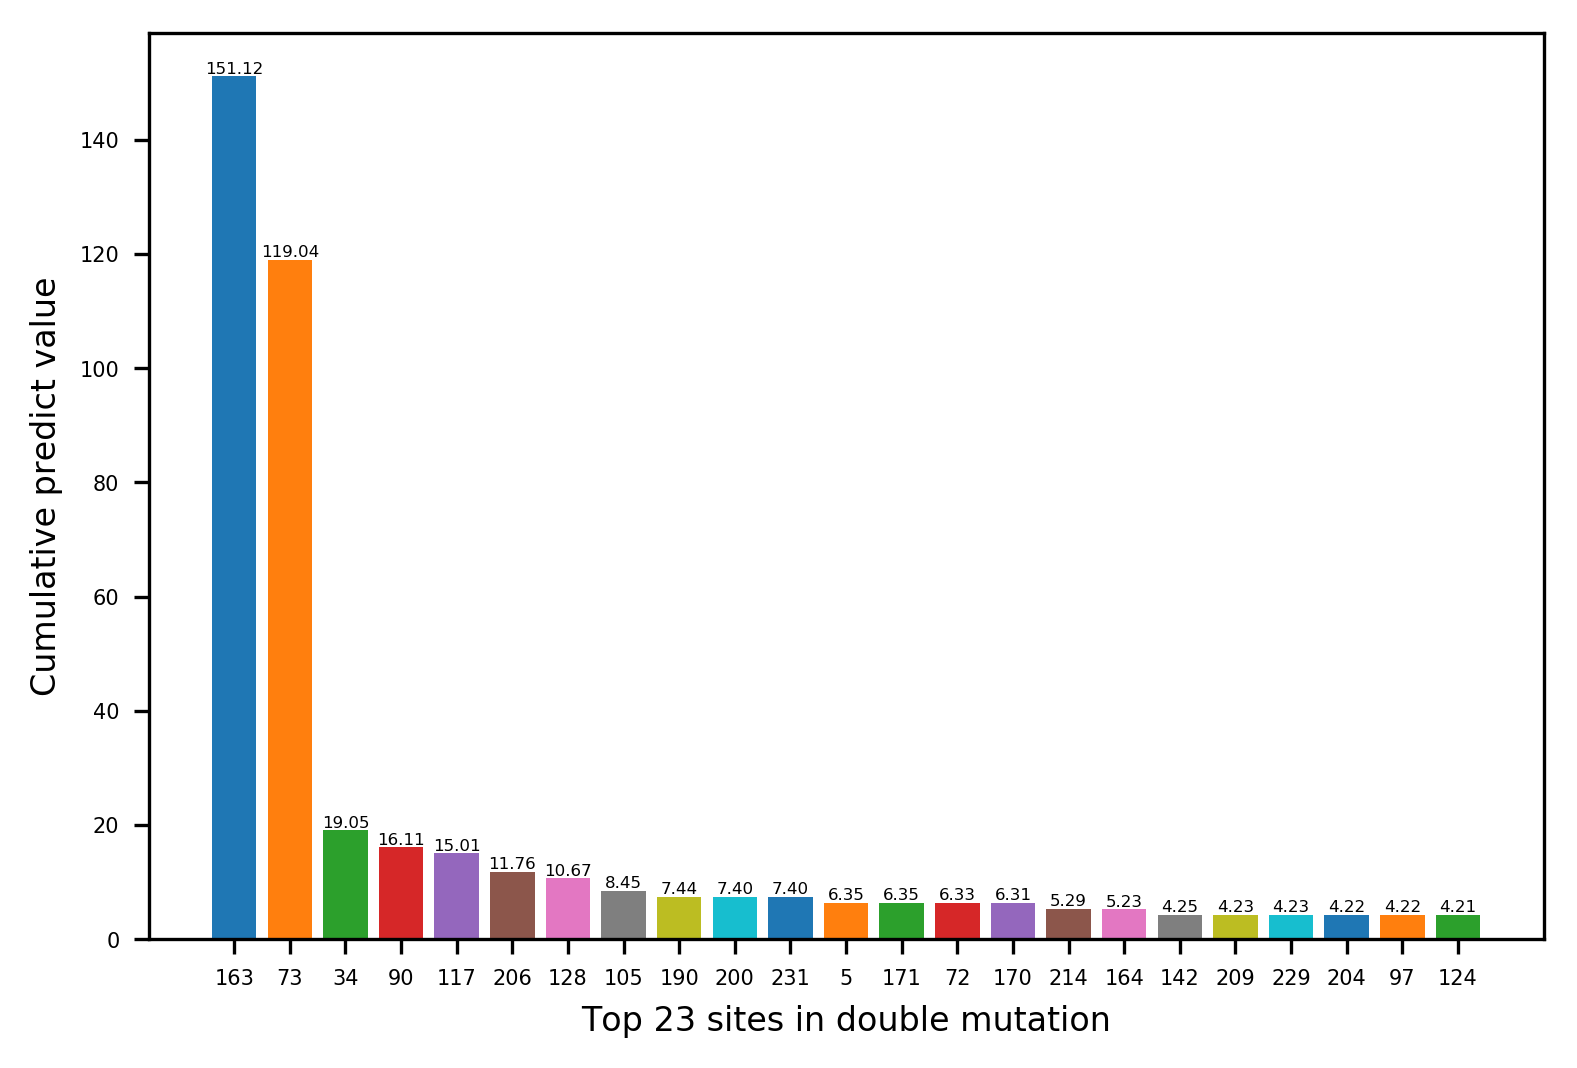

In [12]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

input_path = "/share/jake/github/low_n_output/method_2/temp/eUniRep-Augmenting_method2_train_num_1000_concat_exp_data_multiple_change_norm_top258_double_mutations_seed_0.csv"
all_datas = pd.read_csv(input_path)
mut_pos_list = list(all_datas["mutation_pos"])
mut_num_dict = {}
for mut_pos in mut_pos_list:
    mut_list = mut_pos.split(" ")
    for pos in mut_list:
        if pos in mut_num_dict.keys():
            mut_num_dict[pos] += 1
        else:
            mut_num_dict[pos] = 1
for i in range(239):# avGFP长度
    if str(i) in mut_num_dict.keys():
        continue
    else:
        mut_num_dict[str(i)] = 0
# print(mut_num_dict)
mut_num_dict_new = {}
for i in range(239):
    mut_num_dict_new[str(i)] = mut_num_dict[str(i)]
print("mut_num_dict_new: ", mut_num_dict_new)
mut_fit_dict = {}
for i in range(238):
    mut_fit_dict[str(i)] = 0
for i in tqdm(range(238)):
    for mut_pos in mut_pos_list:
        if str(i) in mut_pos.split(" "):
            fitness = list(all_datas[all_datas["mutation_pos"] == mut_pos]["eUniRep-Augmenting_predict"])[0]
            # print(fitness)
            if str(i) in mut_fit_dict.keys():
                mut_fit_dict[str(i)] += fitness
            else:
                mut_fit_dict[str(i)] = fitness
print("mut_fit_dict: ", mut_fit_dict)
mut_ave_fit_dict = {}
for i in range(238):
    if mut_num_dict_new[str(i)] == 0:
        mut_ave_fit_dict[str(i)] = 0
    else:
        mut_ave_fit_dict[str(i)] = mut_fit_dict[str(i)] / mut_num_dict_new[str(i)]

def bubble_sort(lst_1, lst_2):
    n = len(lst_1)
    for i in range(n):
        for j in range(1, n - i):
            if lst_1[j - 1] > lst_1[j]:
                lst_1[j - 1], lst_1[j] = lst_1[j], lst_1[j - 1]
                lst_2[j - 1], lst_2[j] = lst_2[j], lst_2[j - 1]
    return lst_1, lst_2

target_name = list(mut_fit_dict.keys())
target_fitness = list(mut_fit_dict.values())
target_fitness, target_name = bubble_sort(target_fitness, target_name)

top_10_target_name = target_name[-23:]
top_10_target_fitness = target_fitness[-23:]
top_10_target_name.reverse()
top_10_target_fitness.reverse()
print(top_10_target_name)
print(top_10_target_fitness)

plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams.update({'font.size': 5})
for i, name in enumerate(top_10_target_name):
    plt.bar(str(name),top_10_target_fitness[i])
    plt.text(str(name), top_10_target_fitness[i], "%.2f" % top_10_target_fitness[i], ha="center", va="bottom", fontsize=4)
# plt.title("Use 157 experimental data", fontsize=10)
plt.xlabel("Top 23 sites in double mutation", fontsize=8)
plt.ylabel("Cumulative predict value", fontsize=8)
plt.show()

In [15]:
sort_list = []
for mut_name in top_10_target_name:
    sort_list.append(sort_dict[mut_name])
print(sort_list)
print(len(target_name))

[3, 44, 64, 165, 145, 66, 17, 6, 25, 9, 12, 30, 2, 11, 1, 23, 32, 127, 41, 36, 19, 5, 18]
238
